# K nearest Neighbors 

## Importing the Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
from scipy.stats import pearsonr

## Importing the dataset

In [2]:
dataset = pd.read_csv('/data/private/VM/data/ML_training&testing_v01shuffled_20220317.csv')
dataset

,Year,DOY,EVI,Evapo,LST_Daily,LST_Diff,NDVI,TI,T_air,API,Clay,Elevation,lat,lon,OMC,Porosity,Sand,Silt,Preci,Soil Moisture
0,2015,222,0.120117,-0.002280,29.12,31.14,0.183740,11.589293,23.996123,8.695007,19.700001,1752.627563,40.078119,-112.361396,3.56868,0.490566,37.700001,42.700001,0.000853,0.092000
1,2010,177,0.515586,-0.004072,19.55,8.68,0.685505,14.058996,21.684099,14.624732,22.799999,153.939468,48.726702,3.203102,6.65464,0.509434,10.400000,66.800003,0.000849,0.001500
2,2012,79,0.238310,-0.002077,8.04,10.50,0.410580,14.444198,8.660008,4.510628,23.799999,73.877228,43.717169,3.857831,6.98220,0.490566,29.799999,46.400002,0.321031,0.123435
3,2013,95,0.188224,-0.002522,12.32,29.50,0.352700,15.731341,7.477071,13.977669,31.600000,213.627564,40.052801,-88.372904,6.39604,0.471698,8.800000,59.599998,0.000435,0.394130
4,2007,299,0.435490,-0.001802,8.66,7.38,0.882154,12.428805,7.207212,52.144912,40.299999,192.723587,45.249999,-123.280000,16.34352,0.539623,15.800000,43.799999,0.001720,0.387500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469429,2016,197,0.309898,-0.001307,25.57,15.68,0.588824,13.894586,20.975506,1.797110,14.300000,2563.126221,35.700000,-105.809995,11.55080,0.581132,59.900002,25.799999,0.126868,0.001000
469430,2011,250,0.157988,-0.000601,22.23,32.08,0.256247,11.722256,22.917156,0.250635,17.000000,661.658142,47.759130,-118.745460,4.18932,0.516981,31.100000,51.900002,0.000858,0.072000
469431,2013,147,0.030116,-0.000081,36.09,19.04,0.047282,11.334223,29.584159,0.885216,25.400000,27.083851,36.602000,-117.144897,0.99992,0.520755,42.900002,31.700001,0.000852,0.020667
469432,2013,192,0.518430,-0.003983,25.18,13.34,0.684706,12.998422,24.711874,5.491154,19.799999,246.750183,39.866798,-93.147005,5.56852,0.464151,9.900000,70.199997,0.000854,0.181333


In [3]:
dataset.columns

Index(['Year', 'DOY', 'EVI', 'Evapo', 'LST_Daily', 'LST_Diff', 'NDVI', 'TI',
       'T_air', 'API', 'Clay', 'Elevation', 'lat', 'lon', 'OMC', 'Porosity',
       'Sand', 'Silt', 'Preci', 'Soil Moisture'],
      dtype='object')

In [4]:
# dataset = dataset[0:int(469434*0.1)]
# dataset = dataset[0:1000]
dataset

,Year,DOY,EVI,Evapo,LST_Daily,LST_Diff,NDVI,TI,T_air,API,Clay,Elevation,lat,lon,OMC,Porosity,Sand,Silt,Preci,Soil Moisture
0,2015,222,0.120117,-0.002280,29.12,31.14,0.183740,11.589293,23.996123,8.695007,19.700001,1752.627563,40.078119,-112.361396,3.56868,0.490566,37.700001,42.700001,0.000853,0.092000
1,2010,177,0.515586,-0.004072,19.55,8.68,0.685505,14.058996,21.684099,14.624732,22.799999,153.939468,48.726702,3.203102,6.65464,0.509434,10.400000,66.800003,0.000849,0.001500
2,2012,79,0.238310,-0.002077,8.04,10.50,0.410580,14.444198,8.660008,4.510628,23.799999,73.877228,43.717169,3.857831,6.98220,0.490566,29.799999,46.400002,0.321031,0.123435
3,2013,95,0.188224,-0.002522,12.32,29.50,0.352700,15.731341,7.477071,13.977669,31.600000,213.627564,40.052801,-88.372904,6.39604,0.471698,8.800000,59.599998,0.000435,0.394130
4,2007,299,0.435490,-0.001802,8.66,7.38,0.882154,12.428805,7.207212,52.144912,40.299999,192.723587,45.249999,-123.280000,16.34352,0.539623,15.800000,43.799999,0.001720,0.387500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469429,2016,197,0.309898,-0.001307,25.57,15.68,0.588824,13.894586,20.975506,1.797110,14.300000,2563.126221,35.700000,-105.809995,11.55080,0.581132,59.900002,25.799999,0.126868,0.001000
469430,2011,250,0.157988,-0.000601,22.23,32.08,0.256247,11.722256,22.917156,0.250635,17.000000,661.658142,47.759130,-118.745460,4.18932,0.516981,31.100000,51.900002,0.000858,0.072000
469431,2013,147,0.030116,-0.000081,36.09,19.04,0.047282,11.334223,29.584159,0.885216,25.400000,27.083851,36.602000,-117.144897,0.99992,0.520755,42.900002,31.700001,0.000852,0.020667
469432,2013,192,0.518430,-0.003983,25.18,13.34,0.684706,12.998422,24.711874,5.491154,19.799999,246.750183,39.866798,-93.147005,5.56852,0.464151,9.900000,70.199997,0.000854,0.181333


## Construction of the matrix of characteristics (X) and the dependent variable vector (y)

In [5]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Division of the dataset into the Training Set and the Test Set

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [7]:
X_train.shape

(352075, 19)

In [8]:
X_test.shape

(117359, 19)

In [9]:
X_test1 = X_test

## Very important: Feature scaling of X (range -3 to 3)

### Obs: Fit_transform only applied to X_train to prevent data leaking

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
X_train

array([[ 3.43512648e-01,  1.99929146e-01, -1.07440073e+00, ...,
        -7.51134991e-01,  5.36323062e-01, -2.27753198e-01],
       [ 6.06565046e-02,  3.07526129e-01,  1.73509821e+00, ...,
        -1.16448126e-01,  5.51958448e-01, -2.27758769e-01],
       [ 6.26368792e-01,  5.89968210e-01,  1.38479243e-01, ...,
        -3.84297725e-01,  3.72148820e-01,  2.23496060e+00],
       ...,
       [ 6.26368792e-01, -1.81519770e-03, -1.23109419e+00, ...,
         9.31658477e-01, -9.80332682e-01, -2.28165445e-01],
       [-2.22199639e-01, -1.26607975e+00, -1.78706090e+00, ...,
         6.98819817e-02, -4.17450123e-01, -2.27368806e-01],
       [-2.22199639e-01,  3.07526129e-01,  1.29639206e+00, ...,
        -1.02480720e+00,  2.29533087e+00, -2.27767126e-01]])

In [12]:
# np.max(X_train)
# np.max(X_test)

## Construction and training of the regression model over the training set


In [13]:
from sklearn.neighbors import KNeighborsRegressor  #the class "KNeighborsRegressor" from "neighbors" module of scikit-learn 
# regressor = KNeighborsRegressor(algorithm='auto', leaf_size=10, n_neighbors=5,p=1,weights='distance')
regressor = KNeighborsRegressor(algorithm='ball_tree', leaf_size=20, n_neighbors=4, p=1, weights='distance')
# regressor = KNeighborsRegressor()
regressor.fit(X_train, y_train)

KNeighborsRegressor(algorithm='ball_tree', leaf_size=20, n_neighbors=4, p=1,
                    weights='distance')

## Prediction of Test set results (obtaining y_pred)

In [14]:
import datetime
starttime_testing = datetime.datetime.now()
starttime_testing

datetime.datetime(2023, 3, 8, 10, 22, 36, 841152)

In [15]:
y_pred = regressor.predict(X_test) 

In [16]:
endtime_testing = datetime.datetime.now()
print(endtime_testing)
print("running time of testing")
print(endtime_testing - starttime_testing)

2023-03-08 10:30:55.471351
running time of testing
0:08:18.630199


In [18]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
r2score= r2_score(y_test, y_pred)
print('R2score is',r2score )
MAE=mean_absolute_error(y_test, y_pred)
print('MAE is',MAE)
MSE=mean_squared_error(y_test, y_pred)
print('MSE is',MSE)
RMSE = np.sqrt(MSE)
print('RMSE is',RMSE)
r = pearsonr(y_test, y_pred)
print('r',r)

R2score is 0.8847602664133686
MAE is 0.0234310476710488
MSE is 0.0014332848698600782
RMSE is 0.037858748920957204
r (0.9406810514873134, 0.0)


Text(0.1, 0.37, 'r: 0.94')

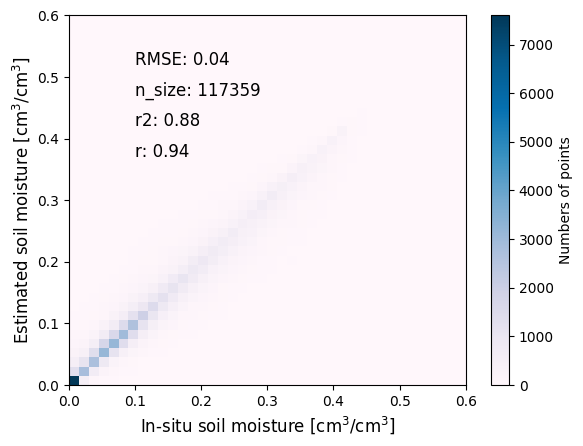

In [19]:
from pylab import hist2d
# show the validation of the test set
plt.figure()
# label of the axis.
plt.xlabel('In-situ soil moisture [$\mathregular{cm^3}$/$\mathregular{cm^3}$]', fontsize=12)
plt.ylabel('Estimated soil moisture [$\mathregular{cm^3}$/$\mathregular{cm^3}$]', fontsize=12)
# plot the data with the density (number of pixels)
h = hist2d(list(y_test), list(y_pred), bins=40, cmap='PuBu',
           range=[[0, 0.6], [0, 0.6]])
cb = plt.colorbar()
cb.set_label('Numbers of points')
# Add 1:1 line
x = np.arange(0, 0.6, 0.1, dtype=float)
y = x
# Add the information of RMSE and r on the figure.
plt.text(0.1, 0.52, 'RMSE: %.2f' % RMSE, fontdict={'size': 12})
plt.text(0.1, 0.47, 'n_size: %d' % len(y_test), fontdict={'size': 12})
plt.text(0.1, 0.42, 'r2: %.2f' % r2score, fontdict={'size': 12})
plt.text(0.1, 0.37, 'r: %.2f' % r[0], fontdict={'size': 12})
# plt.savefig("Kneighbors.png")

In [ ]:
plt.scatter(y_test,y_pred)
plt.xlabel("In-situ Surface Soil Moisture (cm$^3$/cm$^3$)")
plt.ylabel("Kneighbors predicted Surface Soil Moisture (cm$^3$/cm$^3$)")
z = np.polyfit(y_test,y_pred, 1)
p = np.poly1d(z)
plt.plot(y_test,y_pred,"r--")

plt.show()

In [21]:
pd.DataFrame({"insitu":y_test,"predicted":y_pred},columns=["insitu","predicted"]).to_csv(path_or_buf=r'predictedSSM/test_random_KNR.csv', sep=',', index=False)

## per site

In [17]:
def get_site_stats(row):
    y_test = row['Soil Moisture']
    y_pred = row['Predicted']
    metrics_i = {
        'r2': r2_score(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'r': np.corrcoef(y_test, y_pred)[0, 1],
        'n_size': y_test.size
    }
    return pd.Series(metrics_i)

In [18]:
hh = pd.DataFrame(X_test1)
hh.columns = dataset.columns[0:-1]
hh['Predicted'] = y_pred
hh['Soil Moisture'] = y_test
hh

,Year,DOY,EVI,Evapo,LST_Daily,LST_Diff,NDVI,TI,T_air,API,...,Elevation,lat,lon,OMC,Porosity,Sand,Silt,Preci,Predicted,Soil Moisture
0,2015.0,218.0,0.238563,-0.003556,31.41,16.00,0.389563,13.639832,29.109518,22.532099,...,313.751617,36.605398,-97.487801,3.49972,0.430189,12.900000,62.599998,0.001290,0.138256,0.144783
1,2014.0,239.0,0.499025,-0.003532,24.54,9.66,0.798357,15.972043,27.561245,19.036508,...,92.272484,34.255002,-89.873498,6.32708,0.524528,1.900000,79.699997,0.000426,0.171752,0.163696
2,2014.0,205.0,0.163733,-0.001807,26.83,27.00,0.265293,12.178329,18.385873,6.103567,...,1795.768799,45.043467,-112.524095,3.68936,0.498113,38.900002,38.200001,0.006765,0.048031,0.051000
3,2016.0,41.0,0.048950,-0.000041,17.09,3.00,0.083452,10.144185,18.029755,2.338439,...,504.757355,34.157557,-115.145101,0.94820,0.471698,55.500000,28.799999,0.000852,0.090134,0.076000
4,2012.0,264.0,0.285447,-0.000763,16.24,17.74,0.458675,10.988085,14.592750,3.125408,...,2713.882568,39.010000,-111.580001,21.61896,0.569811,33.099998,41.599998,0.001288,0.135619,0.146917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117354,2014.0,364.0,0.150423,-0.001551,6.32,9.26,0.382683,11.787125,6.007813,44.415241,...,236.017914,38.150182,-120.785467,5.18924,0.490566,40.799999,38.000000,0.109795,0.403440,0.410058
117355,2013.0,237.0,0.192040,-0.000395,23.83,20.64,0.266993,15.176023,19.459036,0.176301,...,762.167541,41.300100,-5.247038,5.77540,0.494340,60.700001,18.100000,0.000000,0.081969,0.075375
117356,2012.0,51.0,0.285630,-0.001408,6.11,12.20,0.507140,12.975164,4.544440,42.463486,...,247.596176,34.900002,-86.532998,6.72360,0.501887,9.300000,64.699997,0.000000,0.366399,0.384813
117357,2011.0,272.0,0.273875,-0.001003,14.99,10.72,0.648324,11.806067,14.673877,7.967519,...,3026.673340,38.480000,-109.269995,18.29164,0.600000,37.900002,39.299999,0.000871,0.121202,0.125958


In [ ]:
res_testing = hh.groupby([ 'lat', 'lon'], as_index=False).apply(get_site_stats)

In [20]:
res_testing.to_csv(r'result/KNR_testing_per_station.csv')

## Prediction of validating set results (obtaining y_pred_validating)

In [22]:
dataset_val = pd.read_csv('/data/private/VM/data/ML_validating_v01_20220303.csv')
dataset_val.head()

,station,EVI,Evapo,LST_Daily,LST_Diff,NDVI,TI,T_air,API,Clay,...,ESA-CCI,lat,lon,network,OMC,Porosity,Sand,Silt,Soil Moisture,Preci
0,SAA111,0.267585,-0.002658,13.80,5.34,0.503435,9.724592,10.782256,42.469012,9.4,...,0.256715,68.330194,27.550618,FMI,37.6694,0.762264,55.5,35.099998,0.175417,0.121573
1,SAA111,0.264823,-0.003970,22.36,13.26,0.497070,9.724592,15.129432,38.514693,9.4,...,0.258126,68.330194,27.550618,FMI,37.6694,0.762264,55.5,35.099998,0.172500,0.001892
2,SAA111,0.256537,-0.003107,18.15,11.12,0.477974,9.724592,16.073048,41.956012,9.4,...,0.287426,68.330194,27.550618,FMI,37.6694,0.762264,55.5,35.099998,0.179500,6.832266
3,SAA111,0.220529,-0.003018,10.73,-11.00,0.403011,9.724592,14.346681,41.557064,9.4,...,0.254694,68.330194,27.550618,FMI,37.6694,0.762264,55.5,35.099998,0.179375,0.021294
4,SAA111,0.213499,-0.003174,14.76,5.98,0.396828,9.724592,14.414658,42.532913,9.4,...,0.243986,68.330194,27.550618,FMI,37.6694,0.762264,55.5,35.099998,0.176958,0.166529


In [23]:
dataset_val.shape

(199886, 22)

In [24]:
dataset_val.station.value_counts()

AdamsRanch#1            583
WalnutGulch#1           548
NDAP-SCGN               516
SIERRABLANCA            469
PORTALESAP              447
                       ... 
BaoxieWeatherStation      1
MOORECREEKBRIDGE          1
Coos-Bay-8-SW             1
MascomaRiver              1
Topeka                    1
Name: station, Length: 1550, dtype: int64

In [25]:
dataset_val.columns

Index(['station', 'EVI', 'Evapo', 'LST_Daily', 'LST_Diff', 'NDVI', 'TI',
       'T_air', 'API', 'Clay', 'Date', 'Elevation', 'ESA-CCI', 'lat', 'lon',
       'network', 'OMC', 'Porosity', 'Sand', 'Silt', 'Soil Moisture', 'Preci'],
      dtype='object')

In [26]:
dataset2=pd.to_datetime(dataset_val['Date'])
DOY=dataset2.dt.dayofyear #create a Series "day", where the day of the year is stored
#also allows for weekofyear
Year= dataset2.dt.year #create a "year series"
dataset_val.insert(0, 'DOY', DOY) #insert the day series to the beggining of the dataset
dataset_val.insert(0, 'Year', Year)#insert the year series to the beggining of the dataset
dataset_val.drop(labels=['Date'], axis=1,inplace = True) #eliminate the date column

In [27]:
Xy = dataset_val[dataset.columns]
Xy

,Year,DOY,EVI,Evapo,LST_Daily,LST_Diff,NDVI,TI,T_air,API,Clay,Elevation,lat,lon,OMC,Porosity,Sand,Silt,Preci,Soil Moisture
0,2016,178,0.267585,-0.002658,13.80,5.34,0.503435,9.724592,10.782256,42.469012,9.400000,468.604279,68.330194,27.550618,37.66940,0.762264,55.500000,35.099998,0.121573,0.175417
1,2016,179,0.264823,-0.003970,22.36,13.26,0.497070,9.724592,15.129432,38.514693,9.400000,468.604279,68.330194,27.550618,37.66940,0.762264,55.500000,35.099998,0.001892,0.172500
2,2016,182,0.256537,-0.003107,18.15,11.12,0.477974,9.724592,16.073048,41.956012,9.400000,468.604279,68.330194,27.550618,37.66940,0.762264,55.500000,35.099998,6.832266,0.179500
3,2016,197,0.220529,-0.003018,10.73,-11.00,0.403011,9.724592,14.346681,41.557064,9.400000,468.604279,68.330194,27.550618,37.66940,0.762264,55.500000,35.099998,0.021294,0.179375
4,2016,202,0.213499,-0.003174,14.76,5.98,0.396828,9.724592,14.414658,42.532913,9.400000,468.604279,68.330194,27.550618,37.66940,0.762264,55.500000,35.099998,0.166529,0.176958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199881,2007,243,0.240733,-0.004534,24.88,9.90,0.387445,15.238001,24.888287,8.485890,24.700001,129.928635,38.130001,-88.920000,5.03408,0.475472,5.900000,69.300003,0.000435,0.144600
199882,2007,256,0.227114,-0.003647,18.90,14.94,0.375854,15.238001,20.006017,30.926773,24.700001,129.928635,38.130001,-88.920000,5.03408,0.475472,5.900000,69.300003,0.000858,0.157600
199883,2007,304,0.223807,-0.001522,12.57,8.64,0.392707,15.238001,13.731508,35.938500,24.700001,129.928635,38.130001,-88.920000,5.03408,0.475472,5.900000,69.300003,0.000000,0.353900
199884,2008,197,0.465335,-0.005154,25.11,7.40,0.626214,15.238001,26.364821,45.631101,24.700001,129.928635,38.130001,-88.920000,5.03408,0.475472,5.900000,69.300003,0.001716,0.372900


In [28]:
X_validating = Xy.iloc[:, :-1].values
y_validating = Xy.iloc[:, -1].values
X_validating = sc.transform(X_validating)
X_validating

array([[ 1.47493722e+00, -3.38055770e-01,  2.12423800e-02, ...,
         8.03556515e-01, -1.51644677e-01, -1.14538440e-01],
       [ 1.47493722e+00, -3.24606147e-01, -7.55387217e-04, ...,
         8.03556515e-01, -1.51644677e-01, -2.26396683e-01],
       [ 1.47493722e+00, -2.84257278e-01, -6.67486730e-02, ...,
         8.03556515e-01, -1.51644677e-01,  6.15756472e+00],
       ...,
       [-1.07076807e+00,  1.35659671e+00, -3.27405917e-01, ...,
        -2.08455945e+00,  2.52204755e+00, -2.28165445e-01],
       [-7.87911927e-01, -8.25129351e-02,  1.59608638e+00, ...,
        -2.08455945e+00,  2.52204755e+00, -2.26562012e-01],
       [-7.87911927e-01, -9.59625580e-02,  3.67307950e+00, ...,
         1.17039378e+00, -1.23050274e+00, -2.02881884e-01]])

In [29]:
import datetime
starttime_validating = datetime.datetime.now()
starttime_validating

datetime.datetime(2023, 3, 8, 10, 36, 0, 603259)

In [30]:
y_pred_validating = regressor.predict(X_validating) 

In [31]:
endtime_validating = datetime.datetime.now()
print(endtime_validating)
print("running time of validating")
print(endtime_validating - starttime_validating)

2023-03-08 10:47:11.285112
running time of validating
0:11:10.681853


In [33]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
r2score= r2_score(y_validating, y_pred_validating)
print('R2score is',r2score )
MAE=mean_absolute_error(y_validating, y_pred_validating)
print('MAE is',MAE)
MSE=mean_squared_error(y_validating, y_pred_validating)
print('MSE is',MSE)
RMSE = np.sqrt(MSE)
print('RMSE is',RMSE)
r = pearsonr(y_validating, y_pred_validating)
print('r',r)

R2score is 0.643546783901188
MAE is 0.04551411489421733
MSE is 0.004443514736126816
RMSE is 0.06665969348959547
r (0.8098531316925349, 0.0)


In [34]:
pd.DataFrame({"insitu":y_validating,"predicted":y_pred_validating},columns=["insitu","predicted"]).to_csv(path_or_buf=r'predictedSSM/test_temporal_KNR.csv', sep=',', index=False)

## per site

In [32]:
dataset_val.columns

Index(['Year', 'DOY', 'station', 'EVI', 'Evapo', 'LST_Daily', 'LST_Diff',
       'NDVI', 'TI', 'T_air', 'API', 'Clay', 'Elevation', 'ESA-CCI', 'lat',
       'lon', 'network', 'OMC', 'Porosity', 'Sand', 'Silt', 'Soil Moisture',
       'Preci'],
      dtype='object')

In [33]:
dataset_val['Predicted'] = y_pred_validating

In [34]:
# small check
get_site_stats(dataset_val)

r2             0.643547
MAE            0.045514
MSE            0.004444
RMSE           0.066660
r              0.809853
n_size    199886.000000
dtype: float64

In [ ]:
res_val = dataset_val.groupby(['station', 'lat', 'lon'], as_index=False).apply(get_site_stats)
res_val.to_csv(r'result/KNR_validation_per_station.csv')

## Prediction of independent evaluation results (obtaining y_pred_independent)

In [35]:
import datetime
starttime_independent = datetime.datetime.now()
starttime_independent

datetime.datetime(2023, 3, 8, 10, 49, 50, 556219)

In [36]:
glob.glob("/data/private/VM/data/Independent_stations_v01cleaned0509/*.csv")[0:2]

['/data/private/VM/data/Independent_stations_v01cleaned0509/Independent_SNOTEL_MERCHANTVALLEY.csv',
 '/data/private/VM/data/Independent_stations_v01cleaned0509/Independent_HiWATER-EHWSN_SoilNET-044.csv']

In [42]:
rs = []
r2scores = []
RMSEs = []
networks = []
stations = []
lons = []
lats = []
for files in glob.glob("/data/private/VM/data/Independent_stations_v01cleaned0509/*.csv"):
    print(files.split('/')[-1])
    independentdataset = pd.read_csv(files)
    network = independentdataset['network'][0]
    station = independentdataset['station'][0]
    independentdataset.rename(columns={'Lon':'lon','Lat':'lat'},inplace=True)
    lon = independentdataset['lon'][0]
    lat = independentdataset['lat'][0]
    independentdataset = independentdataset.drop('network', axis=1)
    independentdataset = independentdataset.drop('station', axis=1)
    X_independent = independentdataset.iloc[:, :-1].values
    # print(X_independent)
    y_independent = independentdataset.iloc[:, -1].values
    # print(y_independent)
    X_independent = sc.transform(X_independent)
    y_pred_independent = regressor.predict(X_independent) 
    from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
    r2score= r2_score(y_independent, y_pred_independent)
    # print('R2score is',r2score)
    MAE=mean_absolute_error(y_independent, y_pred_independent)
    MSE=mean_squared_error(y_independent, y_pred_independent)
    RMSE = np.sqrt(MSE)
    # print('RMSE is',RMSE)
    r2scores.append(r2score)
    RMSEs.append(RMSE)
    r = pearsonr(y_independent, y_pred_independent)
    rs.append(r[0])
    # print('r',r)
    networks.append(network)
    stations.append(station)
    lons.append(lon)
    lats.append(lat)
    pd.DataFrame({"insitu":y_independent,"predicted":y_pred_independent},columns=["insitu","predicted"]).to_csv(path_or_buf=r'predictedSSM/KNR/'+files.split('/')[-1], sep=',', index=False)
print('r',rs)
print('R2score is',r2scores)
print("RMSEs",RMSEs)
print('networks',networks)
print('stations',stations)

Independent_SNOTEL_MERCHANTVALLEY.csv
Independent_HiWATER-EHWSN_SoilNET-044.csv
Independent_PBO-H2O_Upington.csv
Independent_PBO-H2O_IMPERIALSP.csv
Independent_MAQU_NST-05.csv
Independent_SMOSMANIA_Condom.csv
Independent_SCAN_PineNut.csv
Independent_SOILSCAPE_node412.csv
Independent_REMEDHUS_Zamarron.csv
Independent_AWDN_Brunswick.csv
Independent_SCAN_GoodwinCreekTimber.csv
Independent_HiWATER-EHWSN_SoilNET-003.csv
Independent_BNZ-LTER_UP1A.csv
Independent_HiWATER-EHWSN_SoilNET-004.csv
Independent_PBO-H2O_KAMASLLOYD.csv
Independent_CTP-SMTMN_S04.csv
Independent_PBO-H2O_QCY2-BARD.csv
Independent_PBO-H2O_REIDHILLVW.csv
Independent_PBO-H2O_SLAVENCYN.csv
Independent_SNOTEL_SantaFe.csv
Independent_HiWATER-EHWSN_WATERNET-10.csv
Independent_SOILSCAPE_node1026.csv
Independent_OZNET_Dry-Lake.csv
Independent_HiWATER-EHWSN_HD-0010.csv
Independent_SCAN_Nephi.csv
Independent_SCAN_UAPBCampus-PB.csv
Independent_COSMOS_RobsonsCreekDualTube.csv
Independent_SCAN_Spooky.csv
Independent_SOILSCAPE_node1030

In [61]:
independentMetrics = pd.DataFrame(data=(networks,stations,lons,lats,rs,r2scores,RMSEs)).T
independentMetrics.columns = ['network','station','lon','lat','r','r2','RMSE']
print(independentMetrics)
independentMetrics.to_csv("/data/private/VM/result/independentMetrics_KNR.csv", sep=',', index=False)

       network         station         lon        lat         r         r2  \
0         SCAN   Cullman-NAHRC  -86.800005  34.199999  0.666861   0.419615   
1       COSMOS        Sterling  -77.485197  38.973899  0.589178  -0.265682   
2       SNOTEL        BIGGOOSE -107.199995  44.580001  0.114808  -0.747317   
3       SNOTEL  BONESPRINGSDIV     -107.58  44.680001    0.5851  -0.190119   
4       SNOTEL        SuuRanch -112.919996  37.600001  0.462605  -0.369635   
..         ...             ...         ...        ...       ...        ...   
143      USCRN    Durham-2-SSW  -70.948405  43.109198   0.55821  -0.085162   
144  SOILSCAPE        node1031  -120.90449  38.386582  0.934298    0.61719   
145        FMI          SOD091   26.639798  67.370788 -0.231103 -48.268495   
146  SOILSCAPE         node803 -120.798287  38.507254  0.681415  -4.783384   
147     SNOTEL    ARAPAHORIDGE -106.379998      40.35  0.394083  -0.045642   

         RMSE  
0    0.084701  
1    0.050028  
2    0.074163  

In [62]:
endtime_independent = datetime.datetime.now()
print(endtime_independent)
print("running time of independent")
print(endtime_independent - starttime_independent)

2022-05-09 15:42:54.984374
running time of independent
0:17:21.769156
